# Deep Learning: Image Classifier CIFAR100



### Import libraries

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import random
%matplotlib inline

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
BASE_FOLDER = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Ejercicio evaluable'


In [ ]:
from tensorflow.keras.datasets import cifar100
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### Training functions

In [ ]:
# Funcition for Model training  without data augmentation
def train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, learn_rate=0.0005):
  # Model summary
  pre_trained_model.summary()

  # Compile the model
  print("[INFO]: Compilando el modelo...")
  pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learn_rate), metrics=["accuracy"])

  # Train the network
  print("[INFO]: Entrenando la red...")
  H_pre = pre_trained_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2) # Reserve 20% for validation
  # Save the model in Drive
  # Save the model using Keras model.save function
  pre_trained_model.save(BASE_FOLDER+"deepCNN_CALTECH101_pretrained.h5")

  # Model evaluation
  print("[INFO]: Evaluando el modelo...")
  # Make predictions (use the same batch_size as in training)
  predictions = pre_trained_model.predict(x_test, batch_size=128)
  # Output the classification report for the test set
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

  # Plots
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()


# Function for training with data augmentation
def train_with_datagen(x_train, y_train, x_test, y_test, model_aug, BASE_FOLDER, data_aug_factor, train_datagen, learn_rate=0.0005, epochs=20):
  # Model summary
  model.summary()

  # Training the solution with data augmentation
  train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=128,
    subset= 'training' o
  )

  validation_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=128,
    subset= 'validation'
  )

  # Compile the model
  print("[INFO]: Compilando el modelo...")
  model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"])

  # Train the network
  print("[INFO]: Entrenando la red...")

  H_aug = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=epochs
)




  # Almacenos el modelo en Drive
  # Montamos la unidad de Drive
  drive.mount('/content/drive')
  # Almacenamos el modelo empleando la función mdoel.save de Keras
  model.save(BASE_FOLDER+"deepCNN_CALTECH101_pretrained.h5")

  # Model evaluations
  print("[INFO]: Evaluando el modelo...")
  # Make predictions (use the same batch_size as in training)
  predictions = model.predict(x_test, batch_size=128)
  # Output the classification report for the test set
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

   # Plots
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 20), H_aug.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 20), H_aug.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 20), H_aug.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 20), H_aug.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

### Dataset Inspection

In [ ]:
#size
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


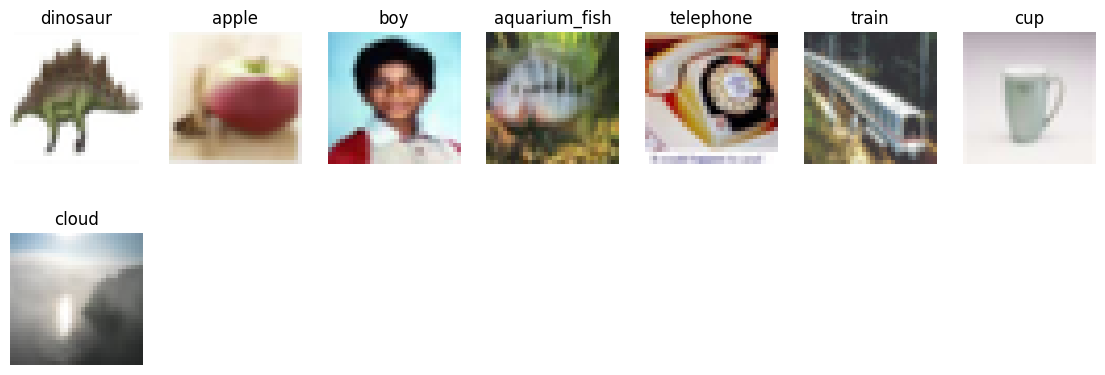

In [ ]:
#print the first 10 images

fig = plt.figure(figsize=(14,10))
for n in range(1, 9):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(labelNames[y_train[n][0]])
    plt.axis('off')

In [ ]:
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
# normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#check that data is normalize
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
y_train[0]

array([19])

[Text(0.5, 1.0, 'Número de muestras por clase'),
 Text(0, 0.5, 'Número de muestras')]

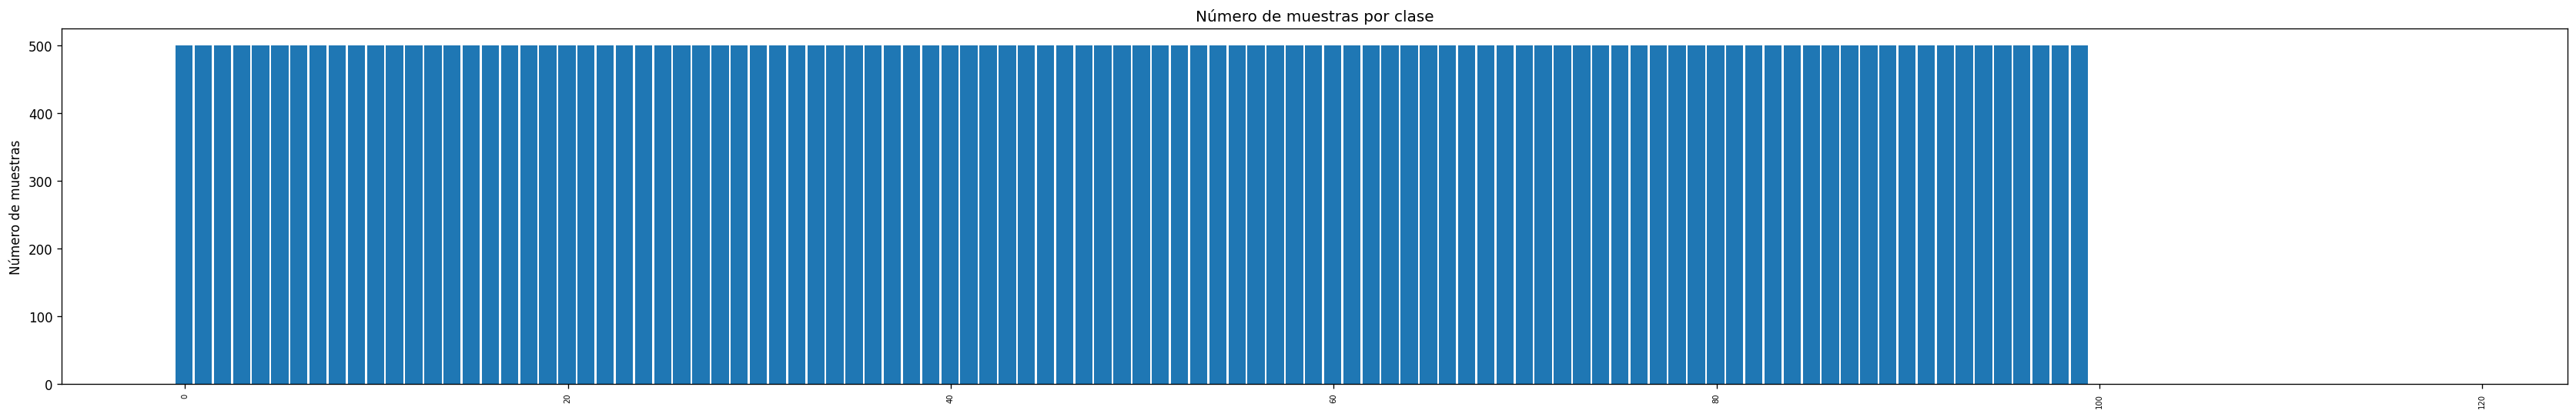

In [ ]:
#Class Distribution: All have 500 images.
plt.rcParams.update({'figure.figsize':(35,5), 'figure.dpi':120})


plt.hist(y_train, bins=range(0,120), width=0.9, align='left')
plt.xticks(rotation = 90, size=6)
plt.gca().set(title='Número de muestras por clase', ylabel='Número de muestras')

In [ ]:
# Visualize the number of samples of a particular class.
label_name = 99
count = 0
for label in y_train:
  if label == label_name:
    count += 1

print(count)

500


### Data preparation

In [ ]:
# We apply OHE (One-Hot Encoding) to the labels.
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
# check
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
x_train.shape[3]


3

## Testing different architectures:

### Architecture 1: (Accuracy 78%, 2.9 million trainable parameters. Quite a bit of overfitting.)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 6ms/step
               precision    recall  f1-score   support

        apple       0.74      0.81      0.77       100
aquarium_fish       0.67      0.72      0.70       100
         baby       0.47      0.28      0.35       100
         bear       0.26      0.22      0.24       100
       beaver       0.29      0.43      0.35       100
          bed       0.52      0.51      0.52       100
          bee       0.57      0.60      0.58       100
       beetle       0.59      0.53      0.56       100
      bicycle       0.79      0.62      0.70       100
       bottle       0.80      0.56      0.66       100
         bowl       0.41      0.36      0.38       100
          boy       0.33      0.40      0.36       100
       bridge       0.53      0.59      0.56       100
          bus       0.52      0.43      0.47       100
    butterfly       0.51      0.44      0.47       100
        camel       0.55      0.39 

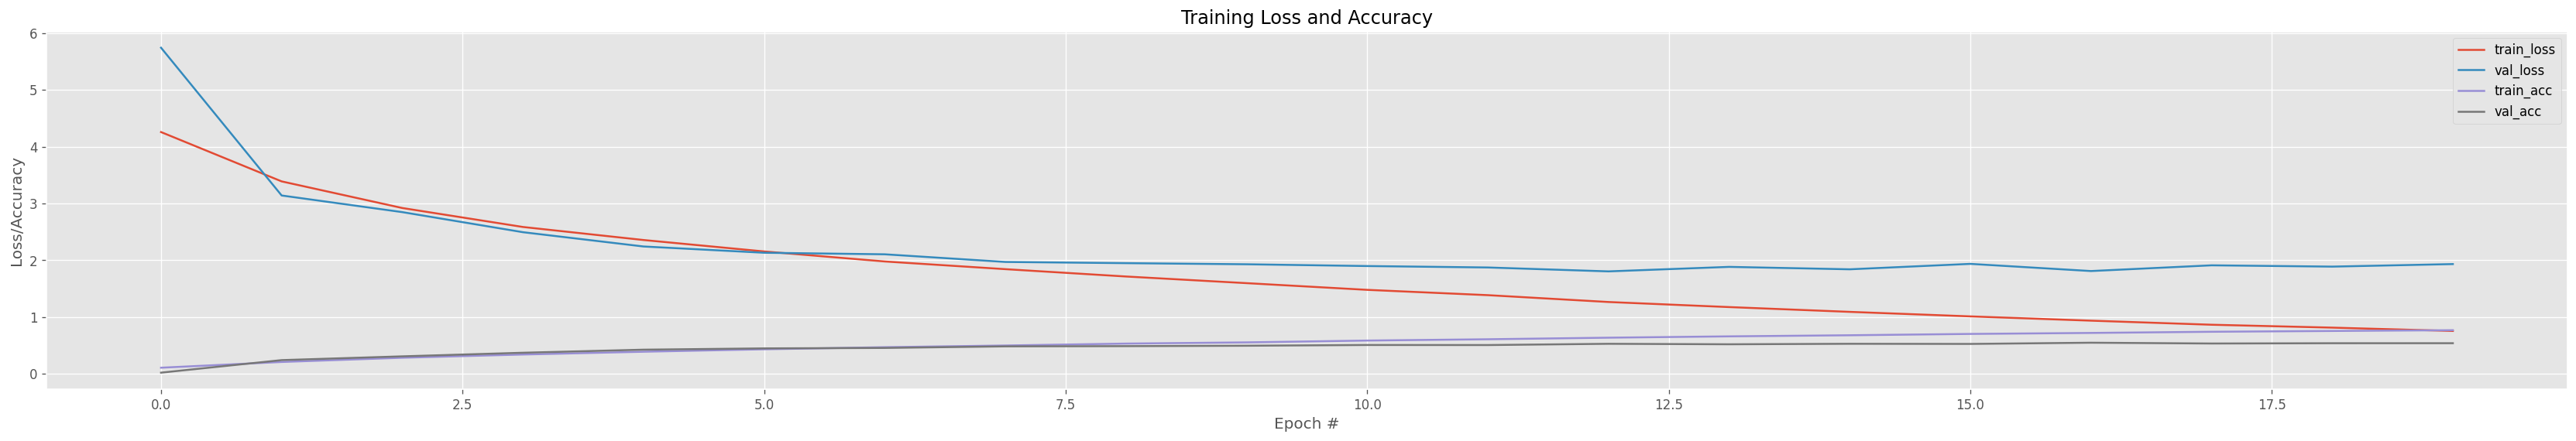

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> encargada de separar entre clases, hacer la clasificación

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER)

### Architecture 2: Deeper architecture (Accuracy of 42%. 1.08 million trainable parameters. No overfitting)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 6ms/step
               precision    recall  f1-score   support

        apple       0.68      0.75      0.71       100
aquarium_fish       0.36      0.60      0.45       100
         baby       0.28      0.37      0.32       100
         bear       0.24      0.12      0.16       100
       beaver       0.19      0.17      0.18       100
          bed       0.48      0.27      0.35       100
          bee       0.36      0.56      0.44       100
       beetle       0.53      0.21      0.30       100
      bicycle       0.57      0.56      0.57       100
       bottle       0.69      0.60      0.64       100
         bowl       0.43      0.34      0.38       100
          boy       0.26      0.12      0.16       100
       bridge       0.36      0.60      0.45       100
          bus       0.29      0.20      0.24       100
    butterfly       0.28      0.27      0.28       100
        camel       0.41      0.24 

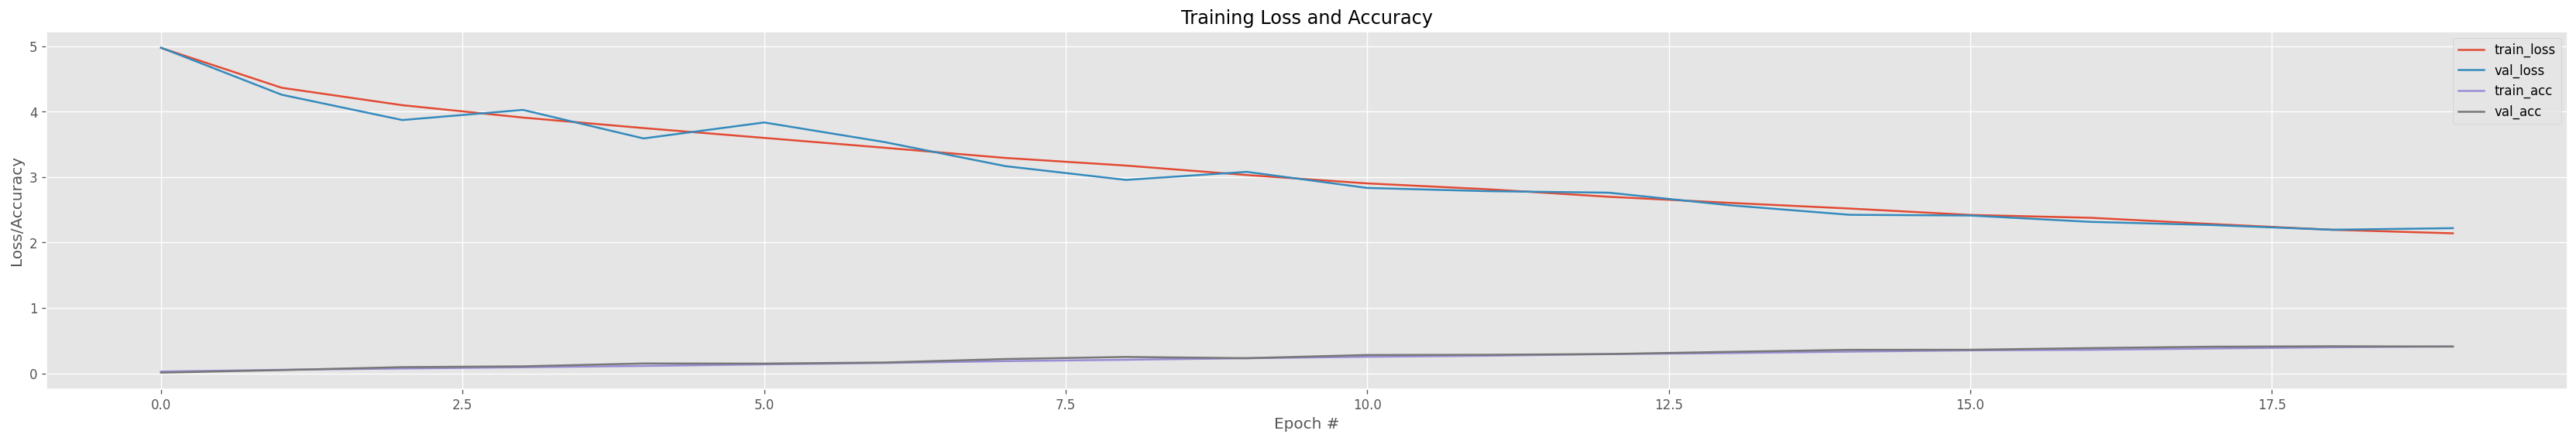

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Cuarto set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Quinto set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> encargada de separar entre clases, hacer la clasificación

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER)

### Conclusions:

We stick with the first model, as it has the highest accuracy, and we aim to reduce overfitting in the following sections through weight regularization and data augmentation.

##  Regularization Parameter Tuning

###   Weight Regularization L1 (no improvement)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 5ms/step
               precision    recall  f1-score   support

        apple       0.54      0.75      0.63       100
aquarium_fish       0.35      0.58      0.44       100
         baby       0.22      0.36      0.27       100
         bear       0.30      0.08      0.13       100
       beaver       0.16      0.18      0.17       100
          bed       0.44      0.36      0.40       100
          bee       0.48      0.29      0.36       100
       beetle       0.60      0.33      0.43       100
      bicycle       0.50      0.70      0.58       100
       bottle       0.68      0.57      0.62       100
         bowl       0.39      0.35      0.37       100
          boy       0.29      0.17      0.22       100
       bridge       0.56      0.35      0.43       100
          bus       0.51      0.19      0.28       100
    butterfly       0.43      0.09      0.15       100
        camel       0.34      0.29 

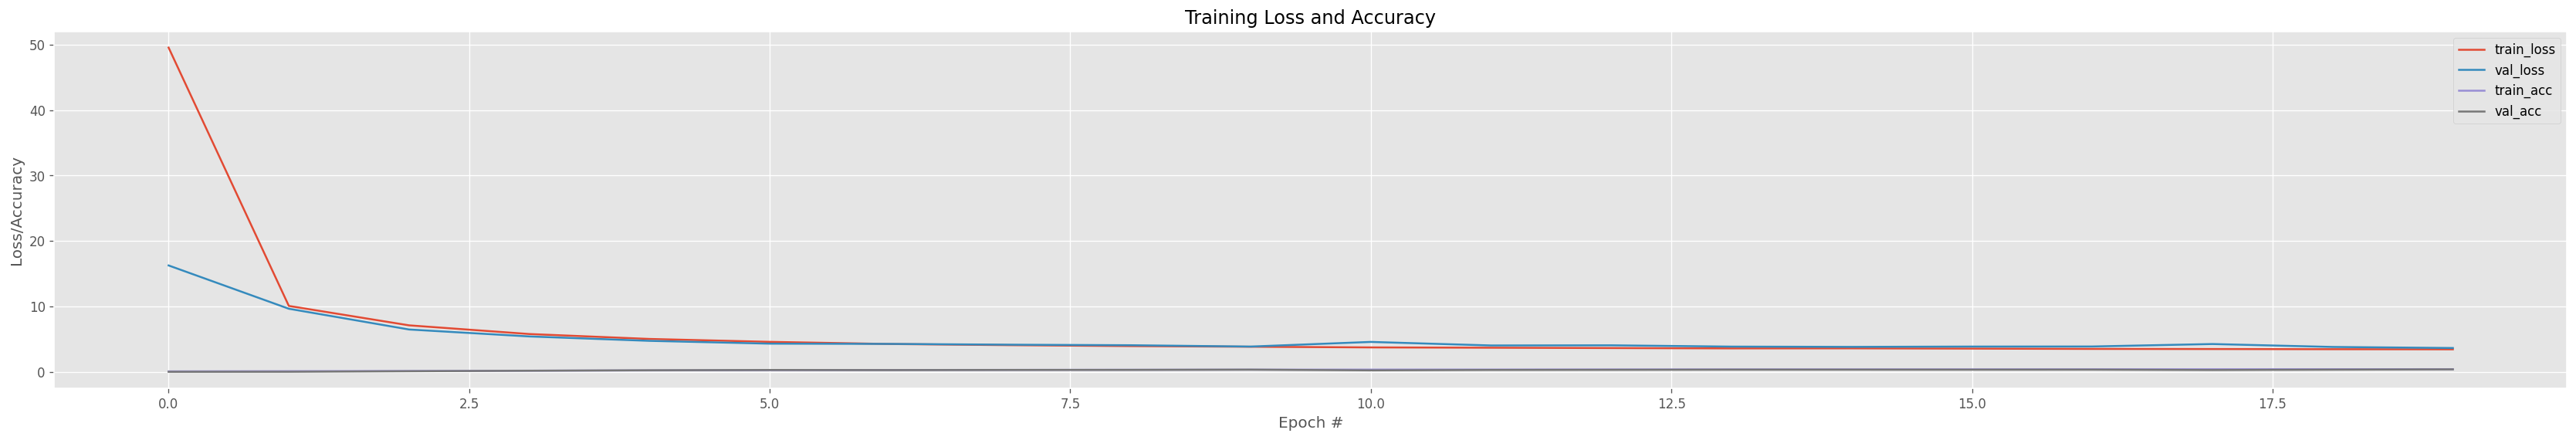

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l1(0.01))(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l1(0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l1(0.01))(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l1(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l1(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l1(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> encargada de separar entre clases, hacer la clasificación

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER)

### Weight Regularization L2: 62% accuracy, significantly improves overfitting.

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_26 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 6ms/step
               precision    recall  f1-score   support

        apple       0.77      0.79      0.78       100
aquarium_fish       0.69      0.67      0.68       100
         baby       0.47      0.41      0.44       100
         bear       0.26      0.32      0.29       100
       beaver       0.34      0.22      0.27       100
          bed       0.43      0.49      0.46       100
          bee       0.44      0.64      0.52       100
       beetle       0.53      0.43      0.48       100
      bicycle       0.66      0.73      0.70       100
       bottle       0.85      0.55      0.67       100
         bowl       0.45      0.27      0.34       100
          boy       0.32      0.43      0.37       100
       bridge       0.68      0.56      0.62       100
          bus       0.73      0.32      0.44       100
    butterfly       0.57      0.40      0.47       100
        camel       0.59      0.42 

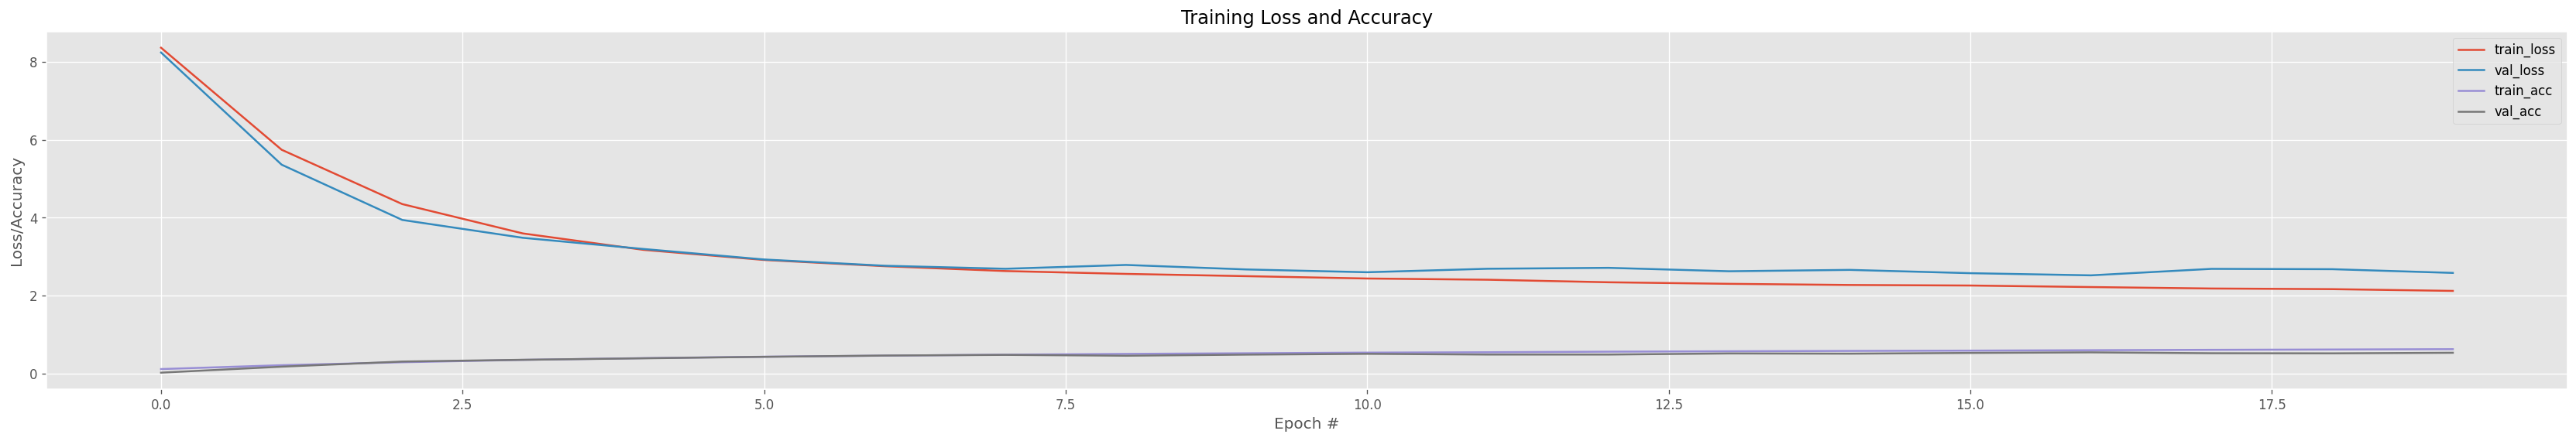

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> encargada de separar entre clases, hacer la clasificación

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train(x_train, y_train, x_test, y_test, model, BASE_FOLDER)

## Data augmentation


### Creation of two samples for each real (no improvement)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_26 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 6ms/step
               precision    recall  f1-score   support

        apple       0.92      0.69      0.79       100
aquarium_fish       0.75      0.70      0.73       100
         baby       0.59      0.36      0.45       100
         bear       0.44      0.16      0.24       100
       beaver       0.34      0.41      0.37       100
          bed       0.42      0.61      0.50       100
          bee       0.50      0.72      0.59       100
       beetle       0.53      0.61      0.56       100
      bicycle       0.72      0.79      0.76       100
       bottle       0.82      0.61      0.70       100
         bowl       0.53      0.44      0.48       100
          boy       0.52      0.29      0.37       100
       bridge       0.58      0.67      0.62       100
          bus       0.64      0.49      0.56       100
    butterfly       0.60      0.51      0.55       100
        camel       0.36      0.48 

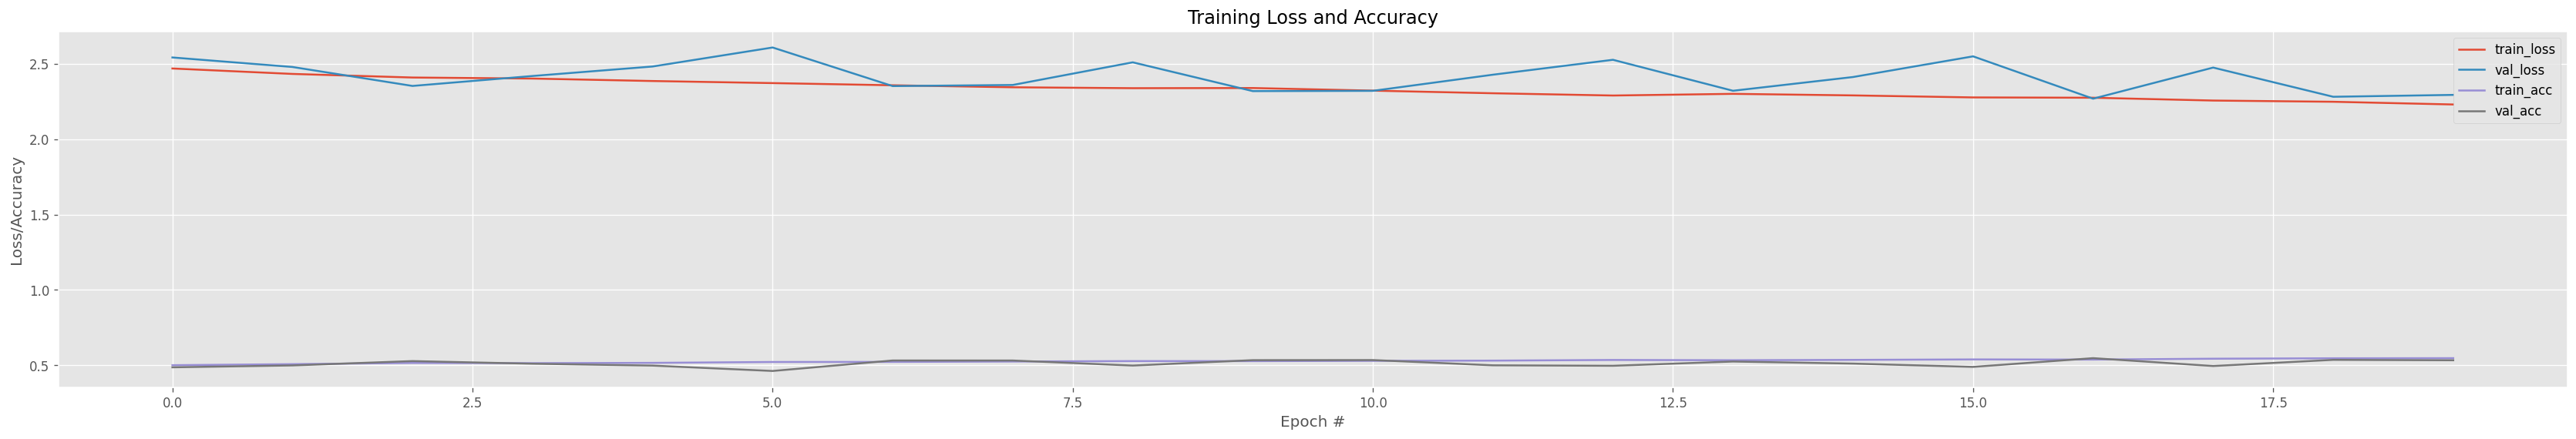

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# TOP MODEL -> encargada de separar entre clases, hacer la clasificación

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(100, activation="softmax")(xfc)
# ---------------------------------------------------------------------------

#Creamos el modelo
model_aug = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución con data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    ##################################################
    # (X) INPUT - Definir la partición de validación
    ##################################################
    validation_split=0.1
    )

data_aug_factor = 2 # Creación de 2 muestras sintéticas por cada muestra real
train_with_datagen(x_train, y_train, x_test, y_test, model_aug, BASE_FOLDER, data_aug_factor, train_datagen)

## General conclusions: 

A simpler architecture has worked better than a deeper one.

The model has significantly improved its overfitting by adjusting the weight regularization parameters.

Using Data Augmentation improves overfitting but does not improve accuracy.